<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Tarea Semanal 14

#### Por Matías Marfisi


# Consigna

![Consigna](Consigna1.png "Consigna")

## Desarrollo

![1](Desarrollo/1.jpeg "1")

![2](Desarrollo/2.jpeg "2")

![3](Desarrollo/3.jpeg "3")

## Simulacion

In [1]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (25,15)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np
import ltspice

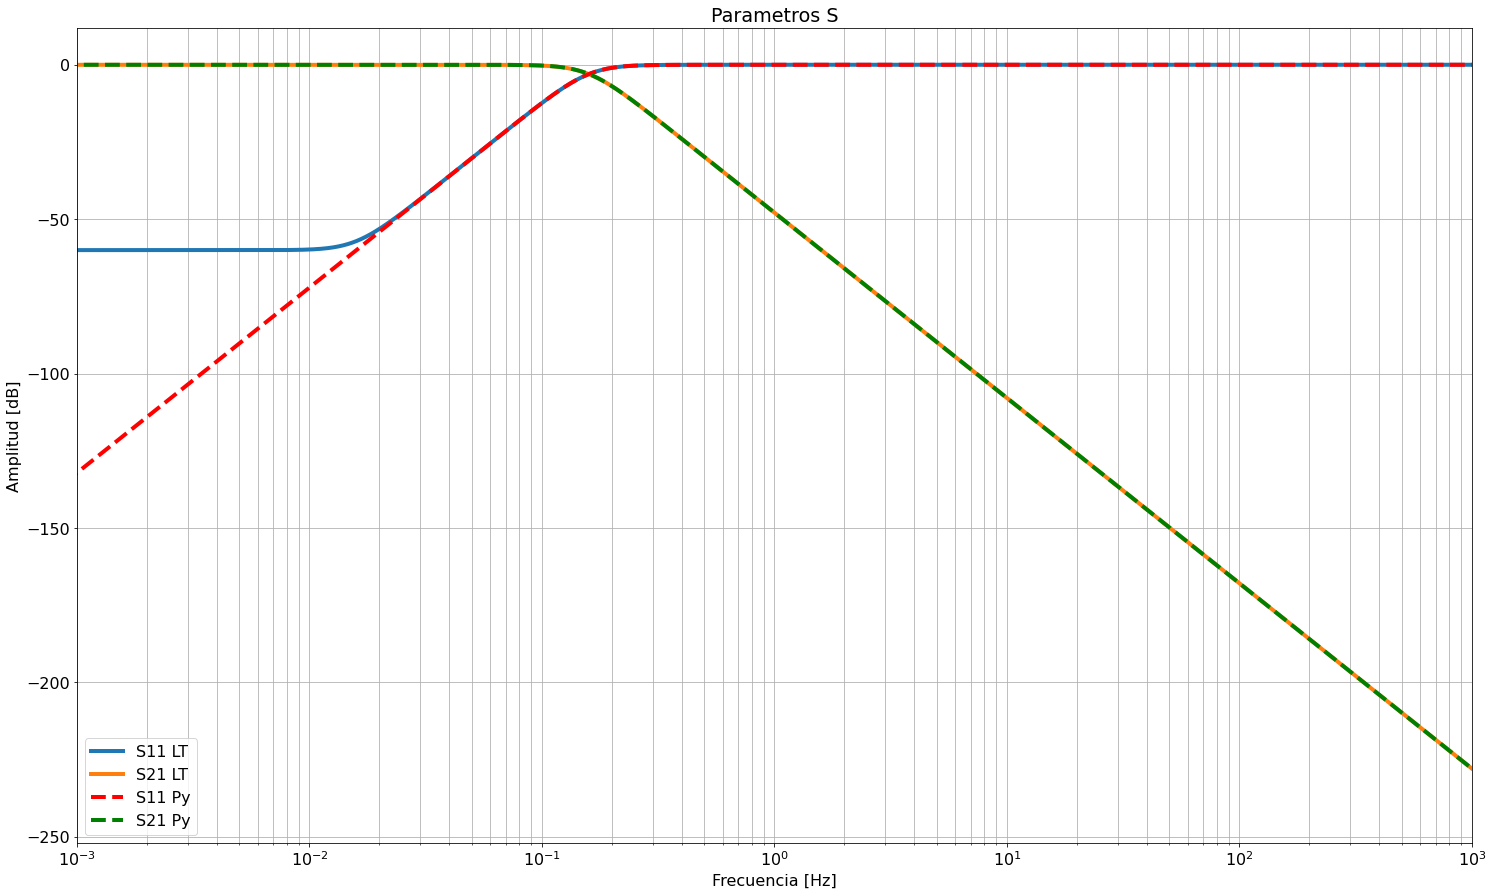

In [5]:
# Importo simulaciones de LTSpice
l = ltspice.Ltspice('Simulacion/EJ1.raw')
l.parse()

freq = l.get_frequency()
S11_LT = l.get_data('S11(v1)')
S21_LT = l.get_data('S21(v1)')

fig, ax = plt.subplots(1,1)

ax.grid(visible='true', which='both', axis='both') 
ax.legend(['LTSpice']) 
ax.set_ylabel('Amplitud [dB]') 
ax.set_xlabel('Frecuencia [Hz]') 
ax.set_xlim([0.001, 1000]) 
    
ax.set_title('Parametros S') 
ax.semilogx(freq, 20 * np.log10(abs(S11_LT)), linewidth=4, label='LTSpice Y') 
ax.semilogx(freq, 20 * np.log10(abs(S21_LT)), linewidth=4, label='LTSpice Y') 


# Obtengo respuesta con freqs
num_s11 = np.array([1, 0, 0, 0])
den_s11 = np.array([1, 2, 2, 1])

num_s21 = np.array([1])
den_s21 = np.array([1, 2, 2, 1])

w = np.logspace(-4, 4, 1000)

_, S11_A = sig.freqs(num_s11, den_s11, w)
_, S21_A = sig.freqs(num_s21, den_s21, w)

ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(S11_A)), 'r--', linewidth=4, label='Freqs') 
ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(S21_A)), 'g--', linewidth=4, label='Freqs') 

ax.legend(['S11 LT', 'S21 LT', 'S11 Py', 'S21 Py']) 